In [1]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from akita_utils.format_io import h5_to_df
from akita_utils.df_utils import (average_stat_over_targets, average_stat_over_backgrounds)

from helper import read_and_average_virtual_exp

### Reading single insertion data

In [3]:
# stat metric the analysis is based on (here: insertion score)
stat_of_analysis_interest = "SCD"
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_singletons"

# reading data, averaging over targets and backgrounds
df = read_and_average_virtual_exp(data_dir, stat_to_average=stat_of_analysis_interest)

reading h5 files to dataframes
averaging over targets
averaging over backgrounds
collecting data for SCD


### Correlations between model

Text(0.71, 0.05, 'Pearson R = 0.9692')

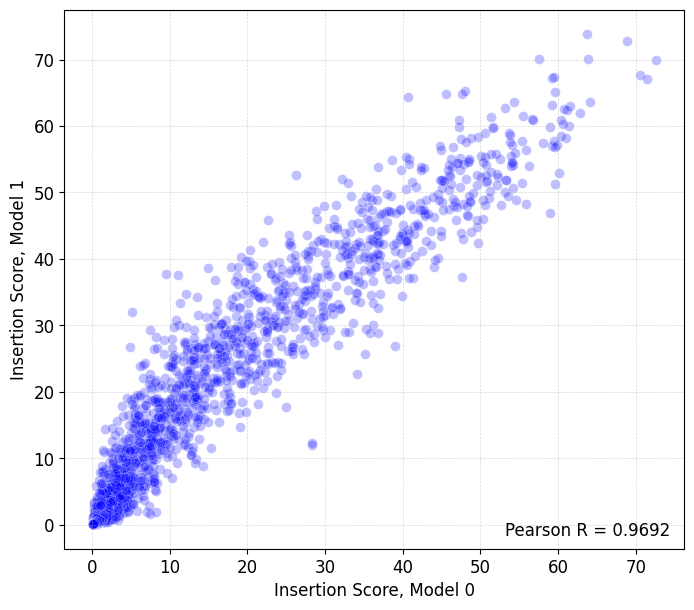

In [4]:
plt.figure(figsize=(8, 7))
plt.scatter(x=df[f"{stat_of_analysis_interest}_m0"], y=df[f"{stat_of_analysis_interest}_m1"], alpha=0.25, edgecolors='w', linewidth=0.5, color='blue', s=50)
m0_m1_corr = round(stats.pearsonr(df[f"{stat_of_analysis_interest}_m0"], df[f"{stat_of_analysis_interest}_m1"]).statistic, 4)

plt.xlabel("Insertion Score, Model 0")
plt.ylabel("Insertion Score, Model 1")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {m0_m1_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/insertion_score_model0_model1.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.98, 'Correlations of insertion score between models')

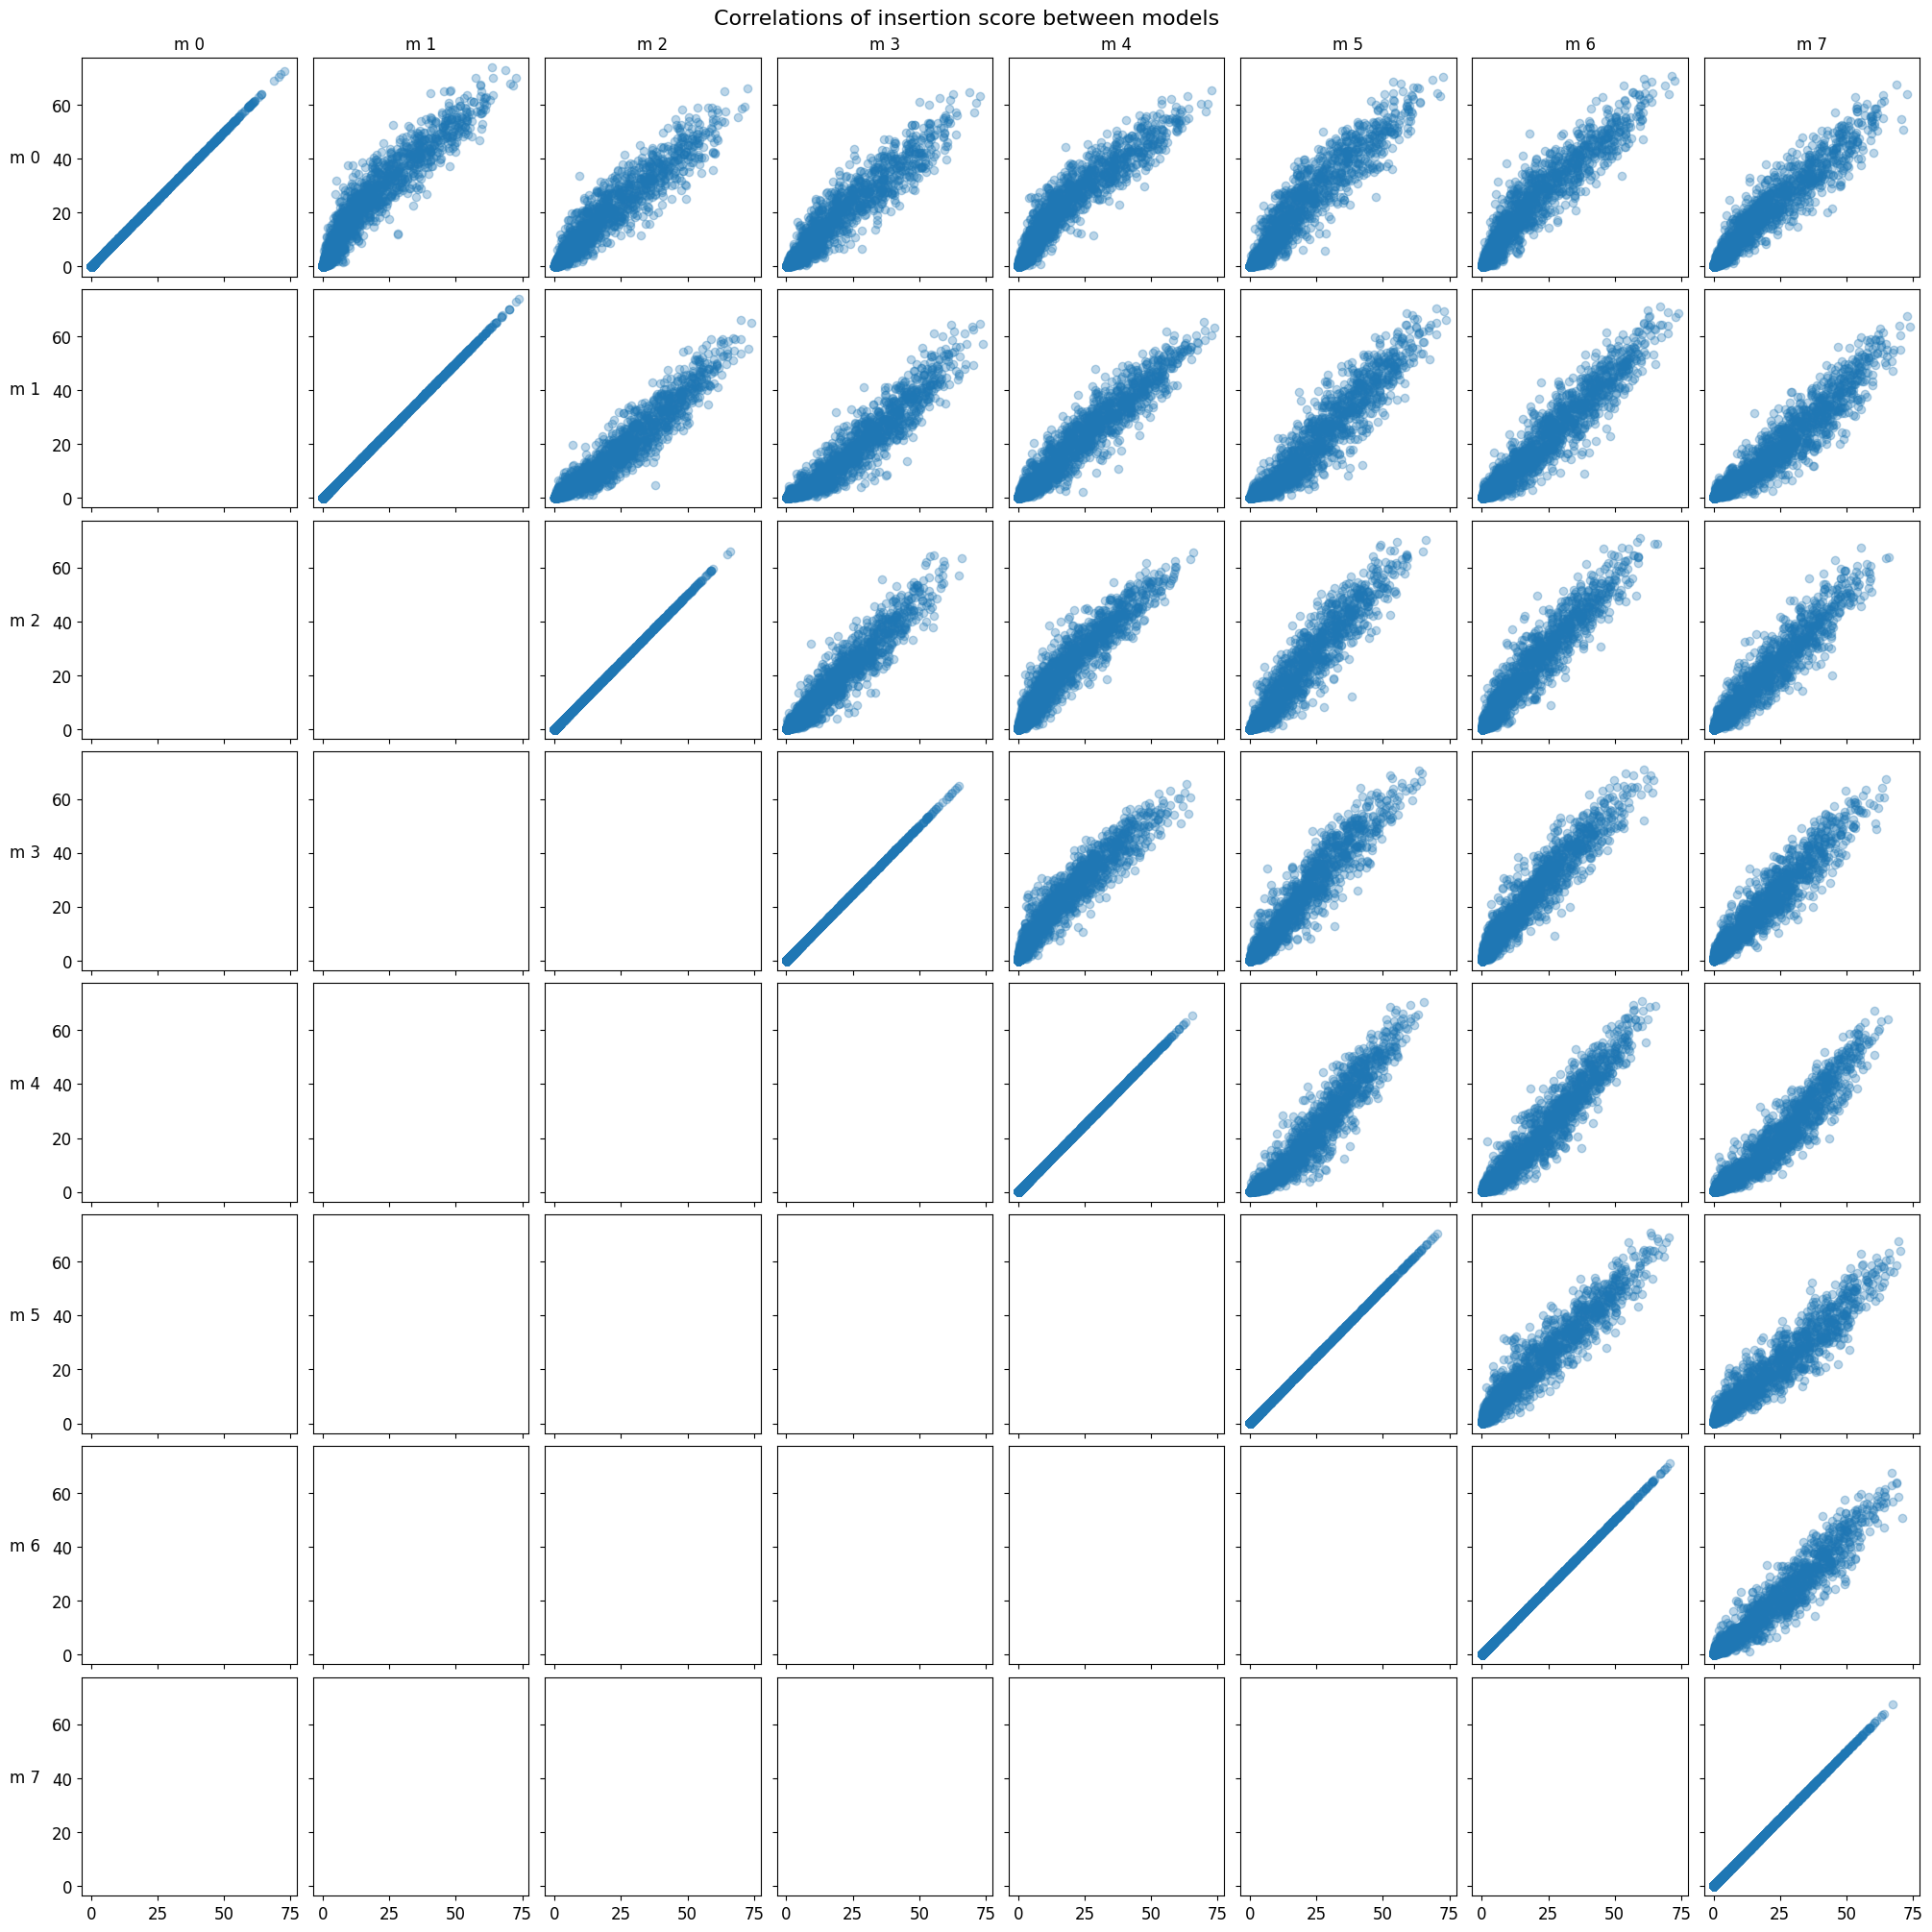

In [6]:
num_models = 8

models_corr_summary = np.zeros((num_models, num_models))

fig, axs = plt.subplots(num_models, num_models, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for model_index_x in range(num_models):
    for model_index_y in range(num_models):
        if (model_index_y >= model_index_x):
            
            stat_x = np.array(df[f"{stat_of_analysis_interest}_m{model_index_x}"])
            stat_y = np.array(df[f"{stat_of_analysis_interest}_m{model_index_y}"])
            
            axs[model_index_x, model_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            models_corr_summary[model_index_x, model_index_y] = models_corr_summary[model_index_y, model_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"m {i}" for i in range(num_models)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of insertion score between models", fontsize=16)

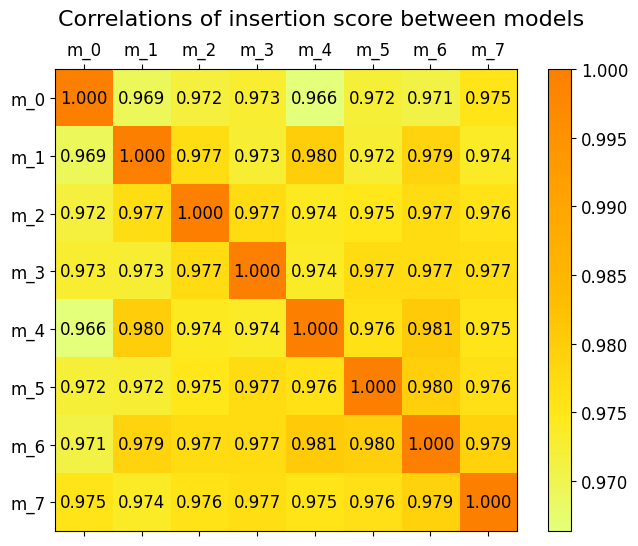

In [7]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(models_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"m_{i}" for i in range(num_models)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(models_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle(f"Correlations of insertion score between models", fontsize=16)

fig.show()

### Correlations between backgrounds

In [8]:
# reading and averaging data for model 0 only
df_m0 = h5_to_df(data_dir+"/model_0.h5", ["SCD", "INS-16", "INS-64"], average=False) 
df_m0_tg = average_stat_over_targets(df_m0, model_index=0, head_index=1, stat=stat_of_analysis_interest)
df_m0_tgbg = average_stat_over_backgrounds(df_m0_tg, model_index=0, head_index=1, stat=stat_of_analysis_interest)

# correlation for 2 backgrounds
x_bg_index = 0
y_bg_index = 1

Text(0.71, 0.05, 'Pearson R = 0.9958')

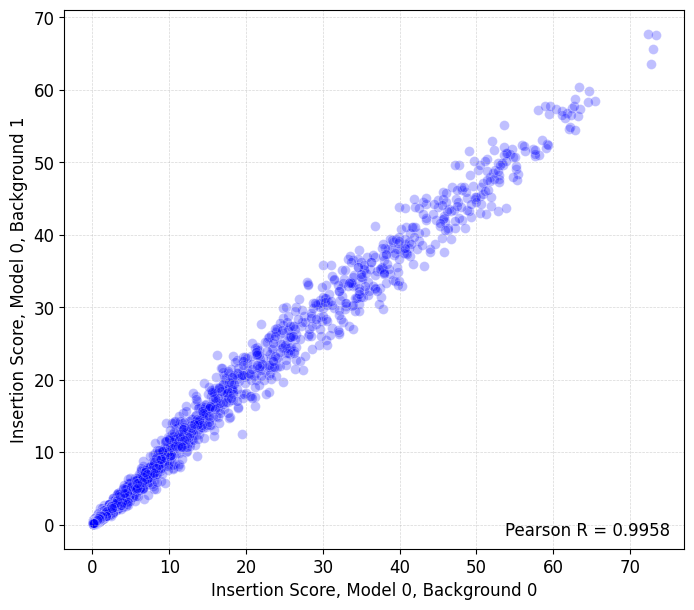

In [9]:
plt.figure(figsize=(8, 7))

plt.scatter(x=df_m0_tgbg[f"{stat_of_analysis_interest}_bg{x_bg_index}"], y=df_m0_tgbg[f"{stat_of_analysis_interest}_bg{y_bg_index}"], alpha=0.25, edgecolors='w', linewidth=0.5, color='blue', s=50)
bg0_bg1_corr = round(stats.pearsonr(df_m0_tgbg[f"{stat_of_analysis_interest}_bg{x_bg_index}"], df_m0_tgbg[f"{stat_of_analysis_interest}_bg{y_bg_index}"]).statistic, 4)

plt.xlabel("Insertion Score, Model 0, Background 0")
plt.ylabel("Insertion Score, Model 0, Background 1")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.text(x=0.71, y=0.05, s=f"Pearson R = {bg0_bg1_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/insertion_score_bg0_bg1.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.98, 'Correlations of insertion score between backgrounds')

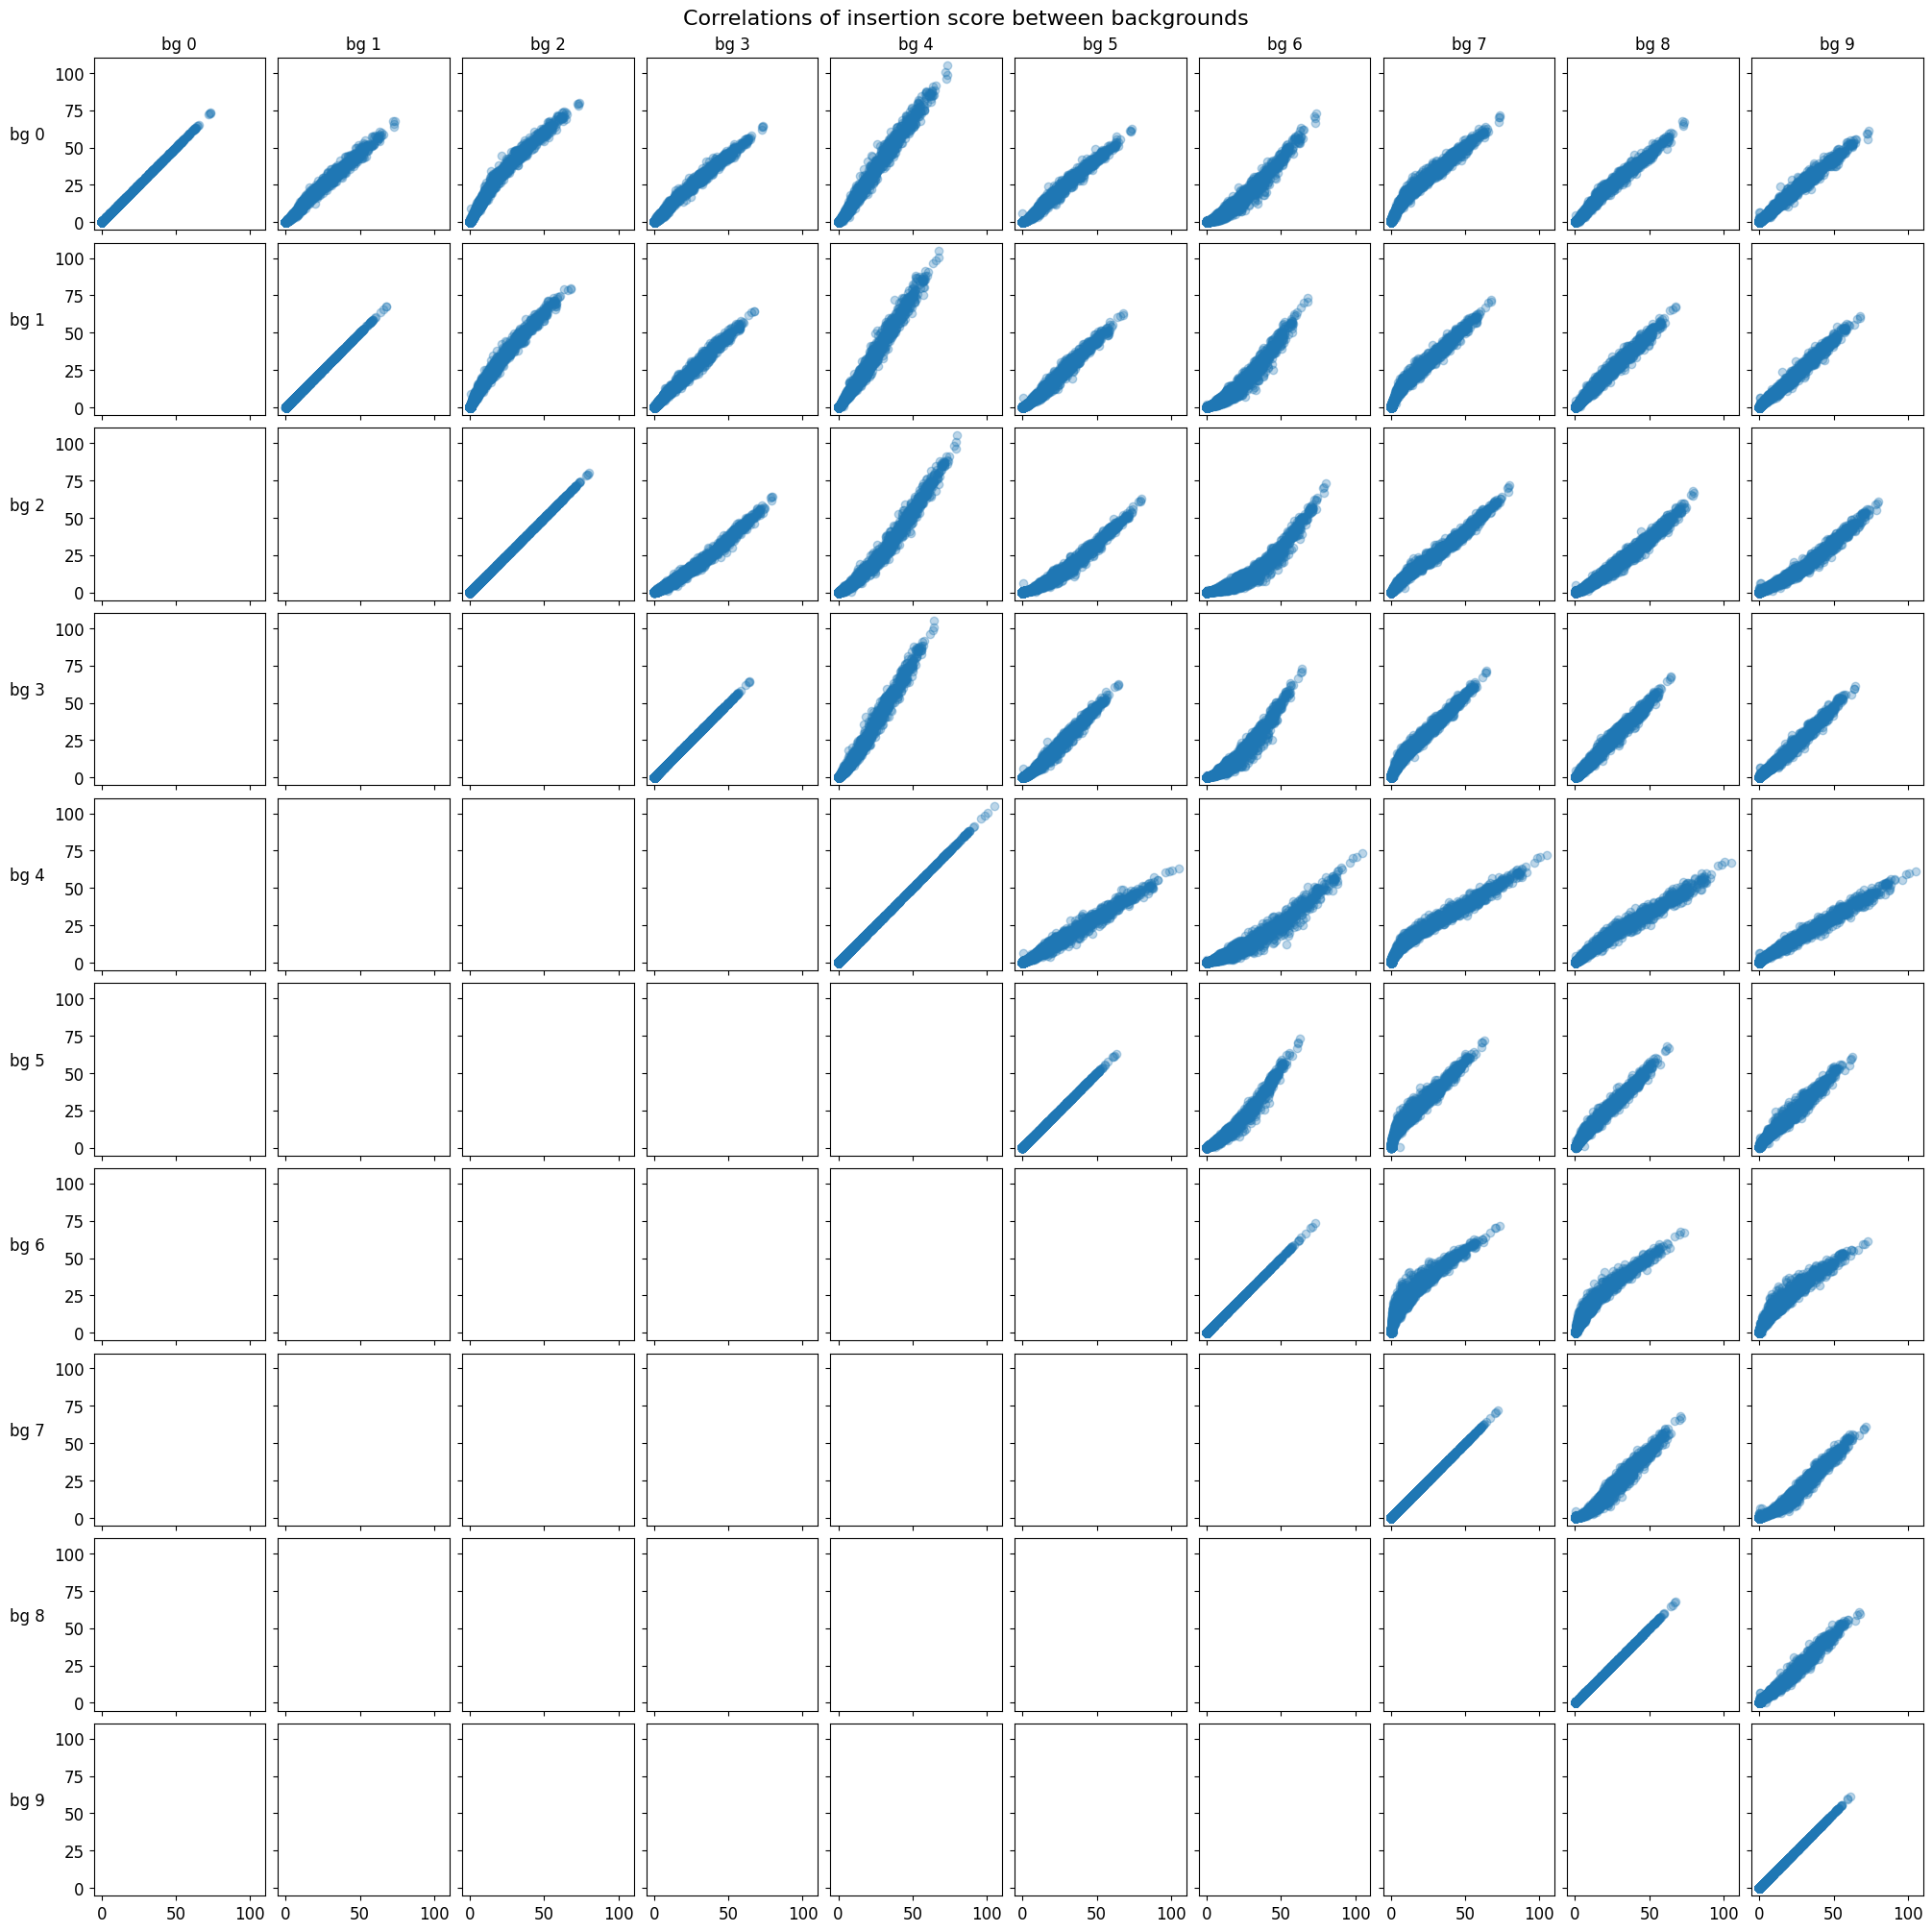

In [10]:
num_backgrounds = 10
model_index = 0
bgs_corr_summary = np.zeros((num_backgrounds, num_backgrounds))

fig, axs = plt.subplots(num_backgrounds, num_backgrounds, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for background_index_x in range(num_backgrounds):
    for background_index_y in range(num_backgrounds):
        if (background_index_y >= background_index_x):
            
            stat_x = np.array(df_m0_tgbg[f"{stat_of_analysis_interest}_bg{background_index_x}"])
            stat_y = np.array(df_m0_tgbg[f"{stat_of_analysis_interest}_bg{background_index_y}"])
            
            axs[background_index_x, background_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            bgs_corr_summary[background_index_x, background_index_y] = bgs_corr_summary[background_index_y, background_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"bg {i}" for i in range(num_backgrounds)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of insertion score between backgrounds", fontsize=16)

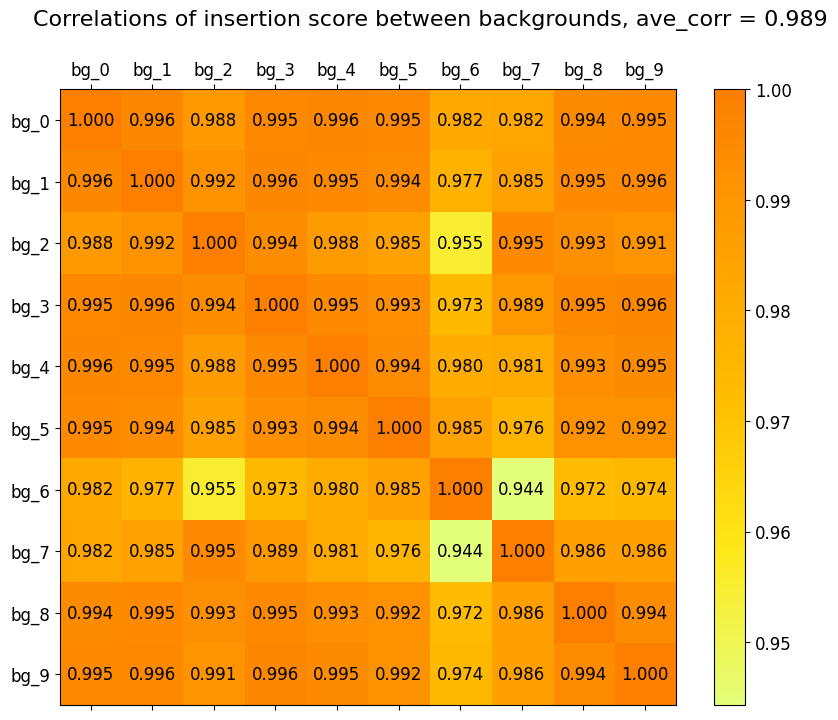

In [11]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
cax = ax.matshow(bgs_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"bg_{i}" for i in range(num_backgrounds)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(bgs_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

ave_corr = np.average(bgs_corr_summary)
    
fig.suptitle(f"Correlations of insertion score between backgrounds, ave_corr = {round(ave_corr, 3)}", fontsize=16)

fig.show()

### Correlations between targets for model 0, background 0

Text(0.5, 0.98, 'Correlations of insertion score between targets (model 0, background 0)')

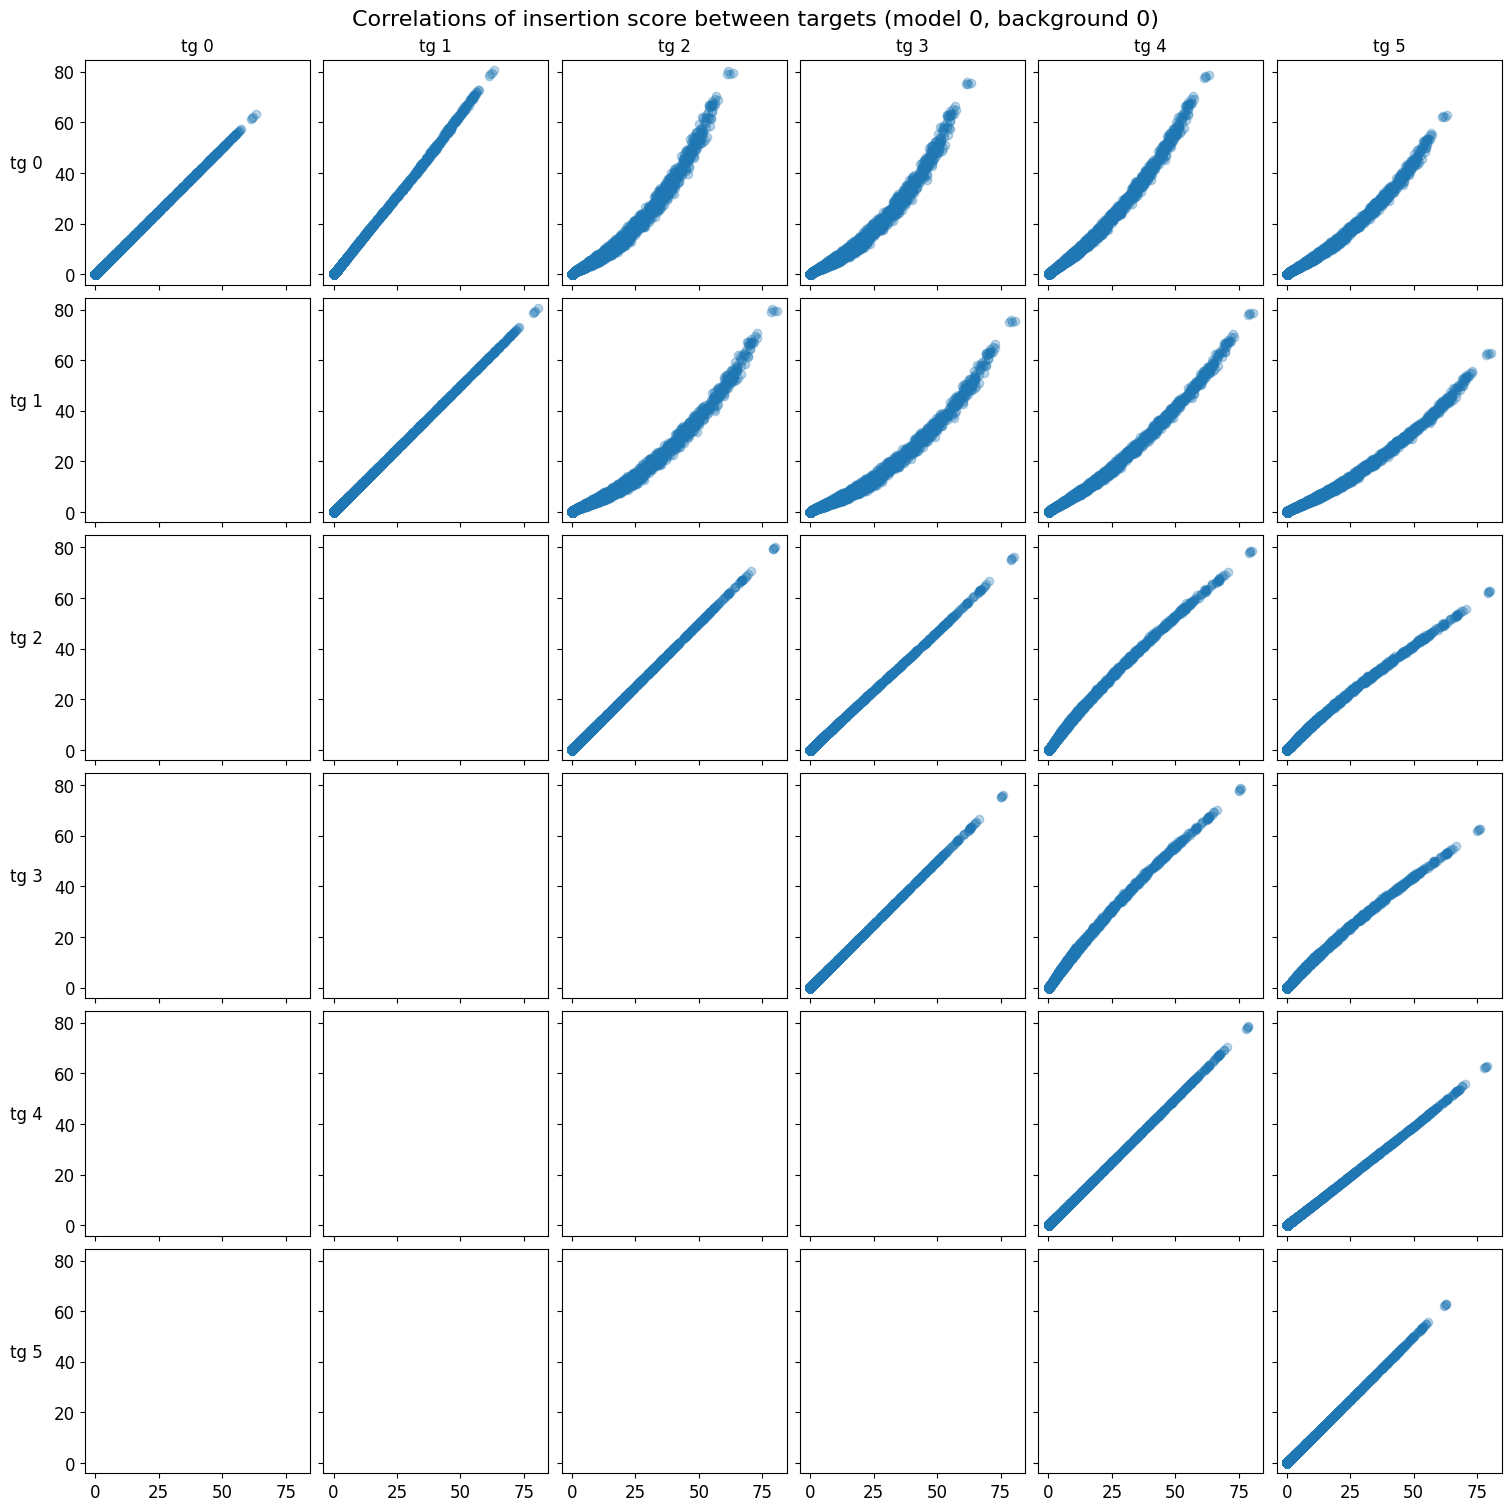

In [12]:
num_targets = 6
model_index = 0
bg_index = 0
targets_corr_summary = np.zeros((num_targets, num_targets))

fig, axs = plt.subplots(num_targets, num_targets, figsize=(15, 15), sharex=True, sharey=True, layout="constrained")

for target_index_x in range(num_targets):
    for target_index_y in range(num_targets):
        if (target_index_y >= target_index_x):
            
            stat_x = np.array(df_m0[df_m0["background_index"] == bg_index][f"{stat_of_analysis_interest}_h1_m{model_index}_t{target_index_x}"])
            stat_y = np.array(df_m0[df_m0["background_index"] == bg_index][f"{stat_of_analysis_interest}_h1_m{model_index}_t{target_index_y}"])
            
            axs[target_index_x, target_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            targets_corr_summary[target_index_x, target_index_y] = targets_corr_summary[target_index_y, target_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"tg {i}" for i in range(num_targets)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle(f"Correlations of insertion score between targets (model 0, background 0)", fontsize=16)

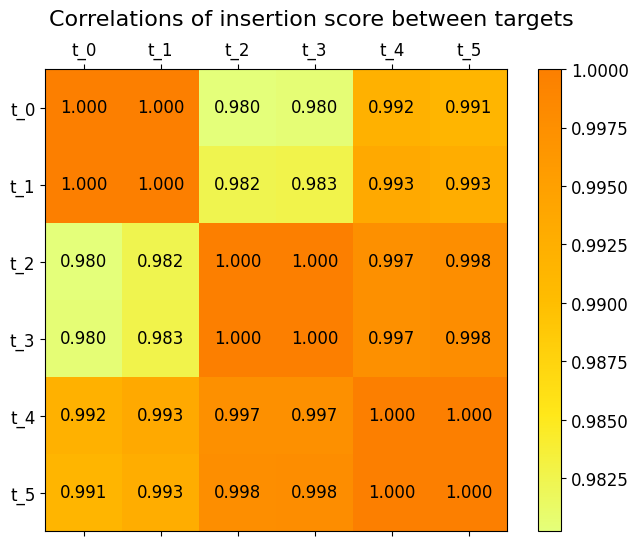

In [13]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(targets_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_targets)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(targets_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle(f"Correlations of insertion score between targets", fontsize=16)

fig.show()